In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from statistics import mean

# Used to convert the lists back into list form not string
import ast

# Used to graph
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Path to the dataframe
data_path = 'SavedData/biz_large.csv'

# Set the file path to a dataframe
biz_df = pd.read_csv(data_path)

# Convert the list columns back to lists not strings
biz_df['customers_sorted_unique'] = biz_df['customers_sorted_unique'].apply(ast.literal_eval)
biz_df['customers_tx_count'] = biz_df['customers_tx_count'].apply(ast.literal_eval)

In [4]:
len(biz_df)

79

## Most Popular Businesses

In [5]:
# Getting the most popular businesses (Businesses featuring most unique users)
# Creates the column featuring number of unique users
biz_df['unique_cust_count'] = biz_df['customers_sorted_unique'].apply(len)

# Average unique customers
unique_cust_list = list(biz_df['unique_cust_count'])
avg_unique_cust_mean = mean(unique_cust_list)

# Sorts dataframe by this new column
pop_biz = biz_df.sort_values(by='unique_cust_count', ascending=False)

# Create two lists of this information
pop_biz_names = list(pop_biz['name'])
pop_biz_names.append('biz_average')
pop_biz_custs = list(pop_biz['unique_cust_count'])
pop_biz_custs.append(avg_unique_cust_mean)

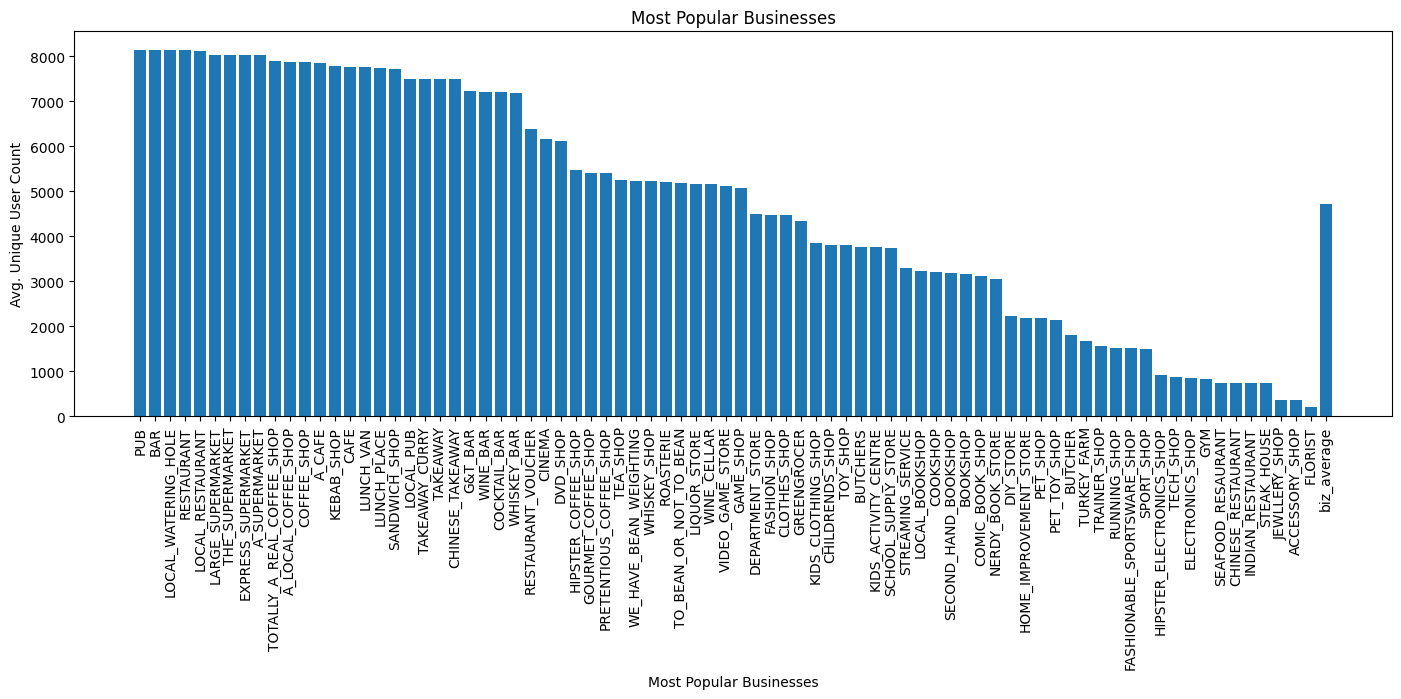

In [9]:
plt.figure(figsize=(17, 5))

plt.bar(pop_biz_names, pop_biz_custs)
plt.xticks(rotation=90)

plt.xlabel('Most Popular Businesses')
plt.ylabel('Avg. Unique User Count')
plt.title('Most Popular Businesses')

plt.show()

## Businesses with Great Loyalty

In [86]:
# Getting the most loyal businesses
# Creates the column featuring the highest average customer re-occurence
biz_df['cust_loyalty'] = biz_df['customers_tx_count'].apply(lambda x: mean(x) if x else None)

# Finds the average of the averages
cust_loyalty_list = list(biz_df['cust_loyalty'])
avg_cust_loyalty_mean = mean(cust_loyalty_list)

# Sorts dataframe by this new column
loyal_biz = biz_df.sort_values(by='cust_loyalty', ascending=False)

# Create two lists of this information
loyal_biz_names = list(loyal_biz['name'])
loyal_biz_names.append('biz_average')
loyal_biz_custs = list(loyal_biz['cust_loyalty'])
loyal_biz_custs.append(avg_cust_loyalty_mean)

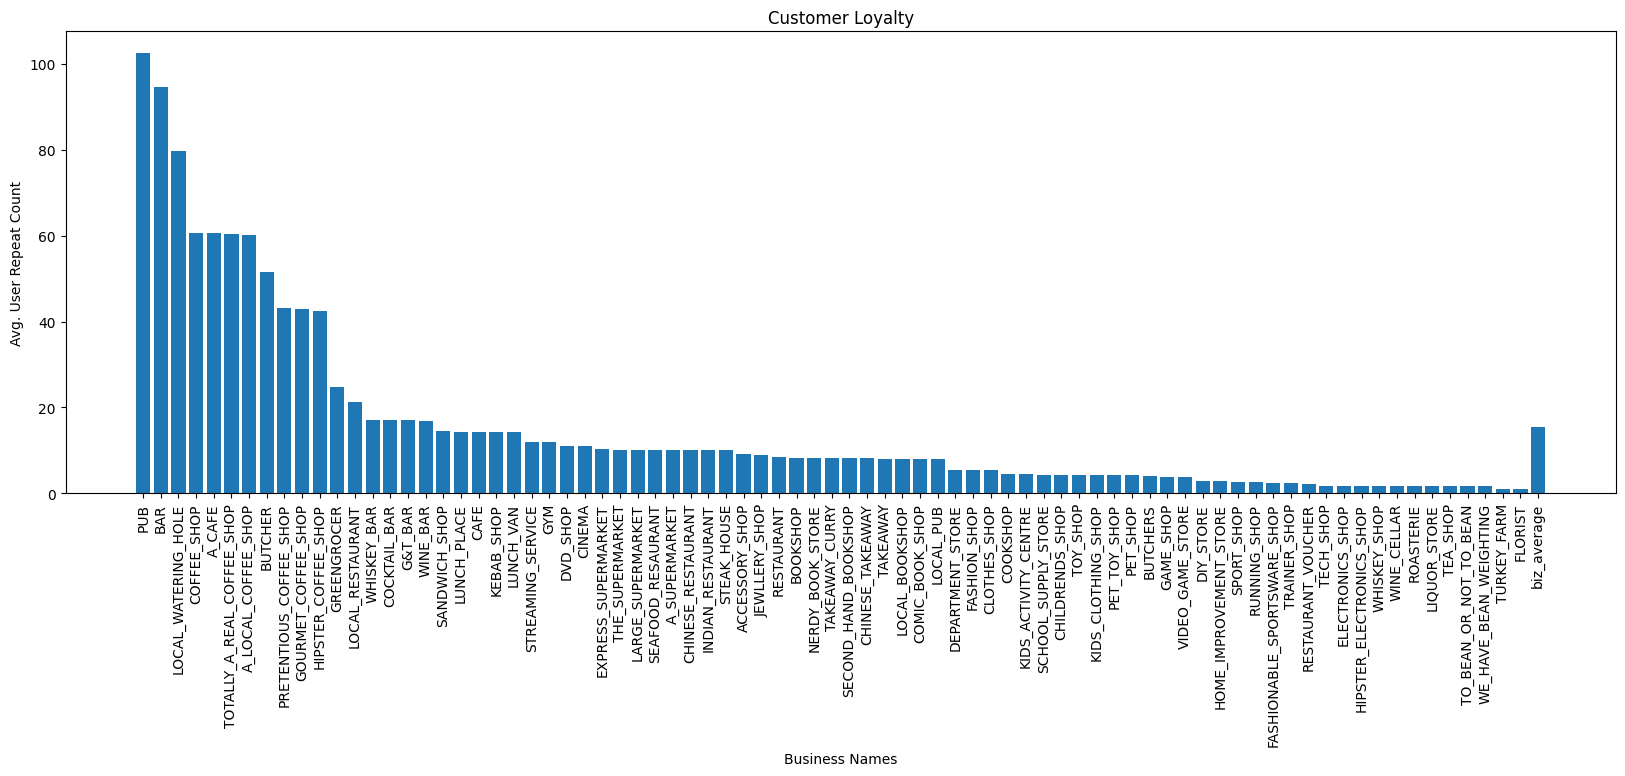

In [87]:
plt.figure(figsize=(20, 6))

plt.bar(pop_biz_names, pop_biz_custs)
plt.xticks(rotation=90)

plt.xlabel('Business Names')
plt.ylabel('Avg. User Repeat Count')
plt.title('Customer Loyalty')

plt.show()

## Businesses Money Makers (Interesting Facts)

In [92]:
# Finds the average of the tx counts
tx_sum_list = list(biz_df['tx_sum_gbp'])
tx_sum_avg = mean(tx_sum_list)

# Sorts dataframe by this new column
rich_biz = biz_df.sort_values(by='tx_sum_gbp', ascending=False)

# Create two lists of this information
rich_biz_names = list(rich_biz['name'])
rich_biz_names.append('biz_average')
rich_biz_sum = list(rich_biz['tx_sum_gbp'])
rich_biz_sum.append(tx_sum_avg)

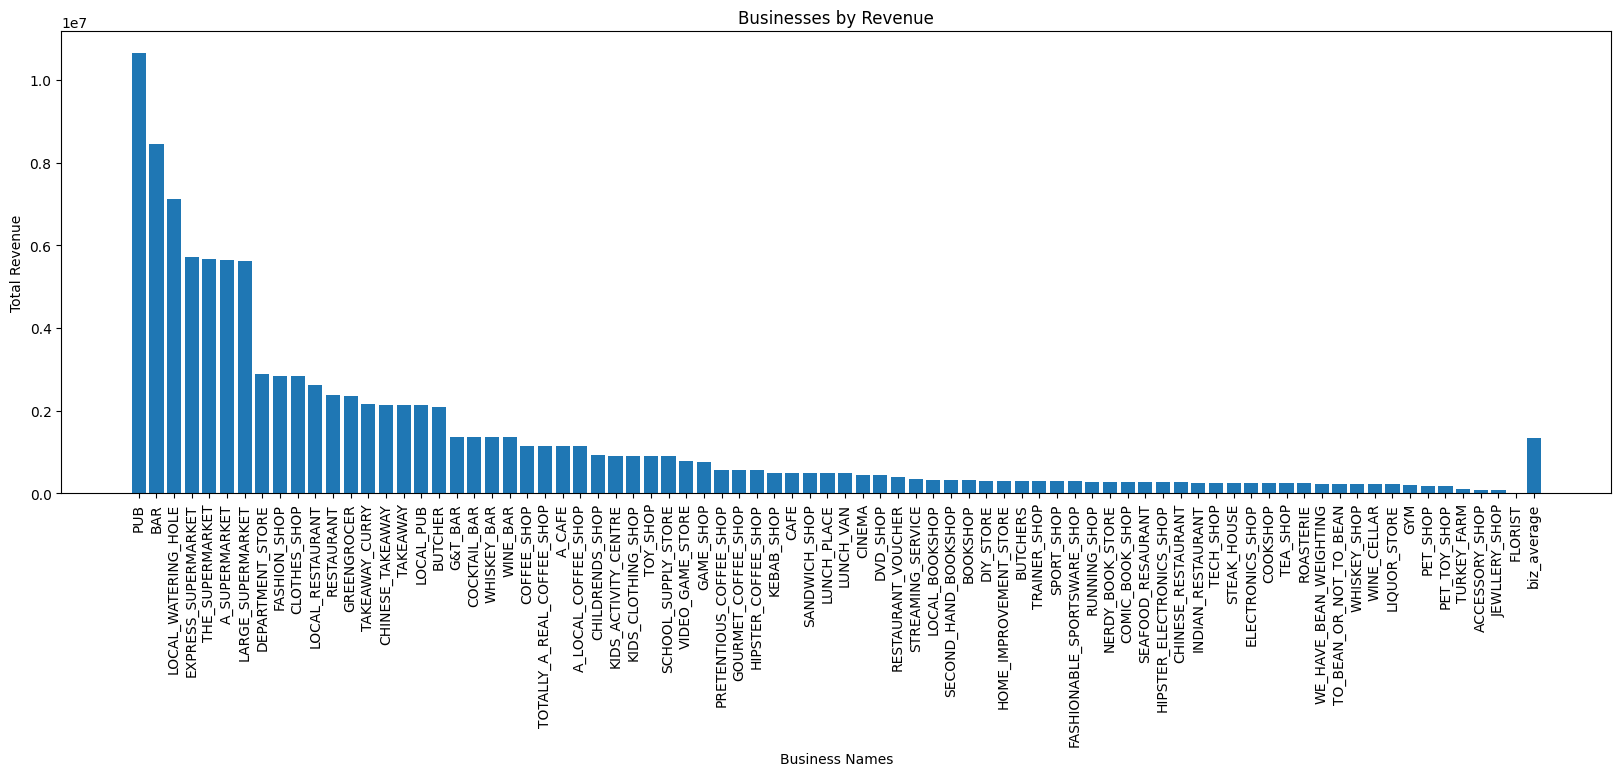

In [99]:
plt.figure(figsize=(20, 6))

plt.bar(rich_biz_names, rich_biz_sum)
plt.xticks(rotation=90)

plt.xlabel('Business Names')
plt.ylabel('Total Revenue')
plt.title('Businesses by Revenue')

plt.show()

### Business Dominance

In [104]:
# Gets the top and bottom of the businesses by revenue
top_count = 10
top_rich_biz = rich_biz.head(1)
top2_10_rich_biz = rich_biz.iloc[1:top_count:]
bottom_rich_biz = rich_biz.iloc[top_count:]

top_rich_biz_sum = int(top_rich_biz['tx_sum_gbp'])
top2_10_rich_biz_sum = sum(list(top2_10_rich_biz['tx_sum_gbp']))
bottom_rich_biz_sum = sum(list(bottom_rich_biz['tx_sum_gbp']))

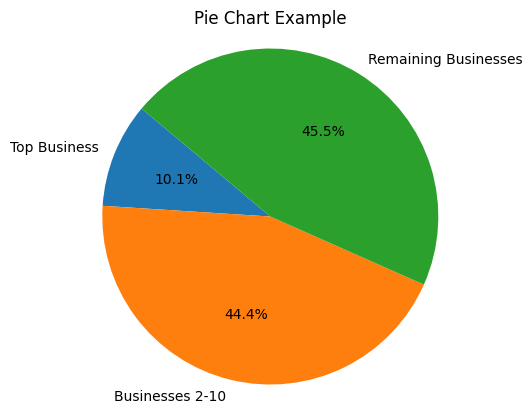

10639504
46765840.61
47987718.29000001


In [106]:
# Creating lists for the pie chart
biz_sum_pie_values = [top_rich_biz_sum, top2_10_rich_biz_sum, bottom_rich_biz_sum]
biz_sum_pie_labels = ['Top Business', 'Businesses 2-10', 'Remaining Businesses']

# Setting values for pie chart
plt.pie(biz_sum_pie_values, labels=biz_sum_pie_labels, autopct='%1.1f%%', startangle=140)

# Ensures it's drawn as a circle
plt.axis('equal')

plt.title('Pie Chart Example')
plt.show()

# Print values for each segment in order
print(top_rich_biz_sum)
print(top2_10_rich_biz_sum)
print(bottom_rich_biz_sum)